In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import datetime
import pytz 
from tzwhere import tzwhere
import math
from suntime import Sun
import scipy as sci
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import cdo
from matplotlib.colors import LinearSegmentedColormap

Loading the climate station data from Berlin, Alexanderplatz

In [189]:
ber_obs_rain = pd.read_csv('../Masterarbeit/produkt_rr_stunde_20020128_20231231_00403.txt', delimiter=';')
ber_obs_clouds = pd.read_csv('../Masterarbeit/produkt_n_stunde_19550101_20231231_00403.txt', delimiter=';')

In [190]:
ber_obs_rain.rename(columns={'  R1': 'R1'}, inplace=True)
ber_obs_clouds.rename(columns={' V_N': 'V_N'}, inplace=True)

In [191]:
ber_obs_rain['MESS_DATUM'] = pd.to_datetime(ber_obs_rain['MESS_DATUM'], format='%Y%m%d%H')
ber_obs_clouds['MESS_DATUM'] = pd.to_datetime(ber_obs_clouds['MESS_DATUM'], format='%Y%m%d%H')


start_date_21 = pd.Timestamp(2021, 7, 4, 21)  
end_date_21 = pd.Timestamp(2021, 7, 10, 19)   

ber_obs_21_rain = ber_obs_rain[(ber_obs_rain['MESS_DATUM'] >= start_date_21) & (ber_obs_rain['MESS_DATUM'] <= end_date_21)]
ber_obs_21_clouds = ber_obs_clouds[(ber_obs_clouds['MESS_DATUM'] >= start_date_21) & (ber_obs_clouds['MESS_DATUM'] <= end_date_21)]

In [192]:
start_date_22 = pd.Timestamp(2022, 6, 15)
end_date_22 = pd.Timestamp(2022, 6, 20)

ber_obs_22_rain = ber_obs_rain[(ber_obs_rain['MESS_DATUM'] >= start_date_22) & (ber_obs_rain['MESS_DATUM'] <= end_date_22)]
ber_obs_22_clouds = ber_obs_clouds[(ber_obs_clouds['MESS_DATUM'] >= start_date_22) & (ber_obs_clouds['MESS_DATUM'] <= end_date_22)]

In [193]:
sns.set_style("whitegrid")

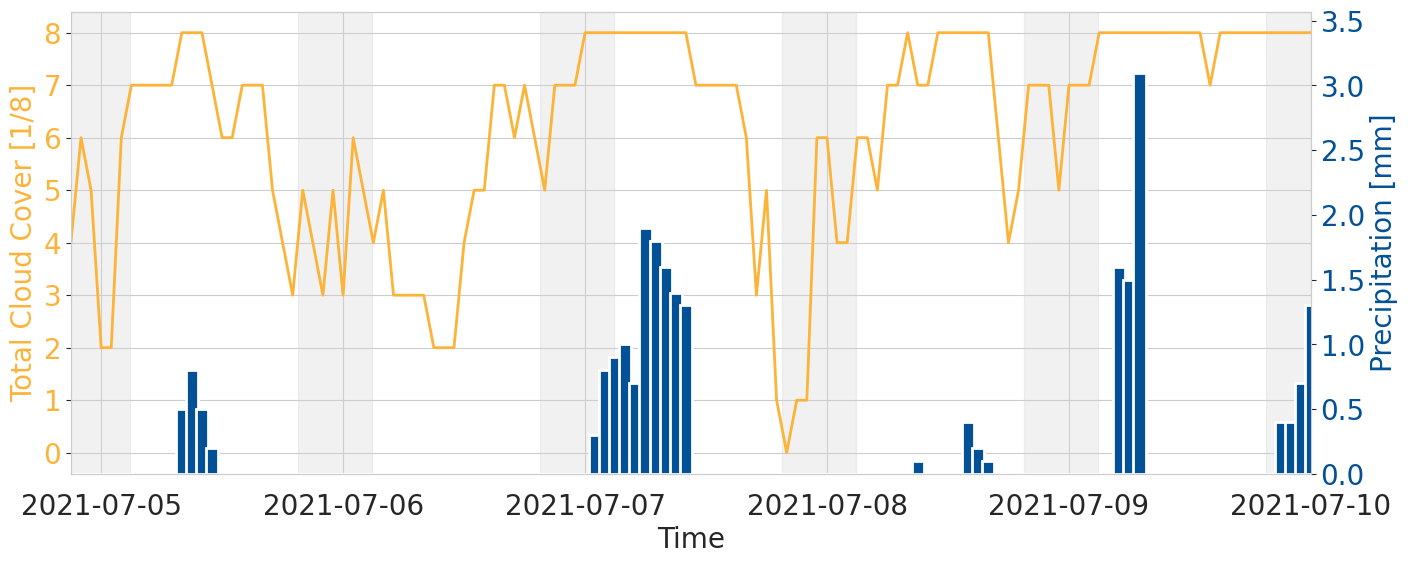

In [265]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(params)

fig, ax1 = plt.subplots(figsize=(16, 6))

# Define night start and end times
a, b = 19, 31
c, d = 2, 50

night_start = [pd.Timestamp(2021, 7, 4, a, b), pd.Timestamp(2021, 7, 5, a, b),
               pd.Timestamp(2021, 7, 6, a, b), pd.Timestamp(2021, 7, 7, a, b),
               pd.Timestamp(2021, 7, 8, a, b), pd.Timestamp(2021, 7, 9, a, b),
               pd.Timestamp(2021, 7, 10, a, b)]
night_end = [pd.Timestamp(2021, 7, 5, c, d), pd.Timestamp(2021, 7, 6, c, d),
             pd.Timestamp(2021, 7, 7, c, d), pd.Timestamp(2021, 7, 8, c, d),
             pd.Timestamp(2021, 7, 9, c, d), pd.Timestamp(2021, 7, 10, c, d)]

for start, end in zip(night_start, night_end):
    ax1.axvspan(start, end, color='lightgrey', alpha=0.3)

ax1.plot(ber_obs_21_clouds.MESS_DATUM, ber_obs_21_clouds.V_N, color='#FDB338', lw=2, label='Cloud Cover')
ax1.set_ylabel('Total Cloud Cover [1/8]', size=20, color='#FDB338')
ax1.tick_params(axis='y', labelcolor='#FDB338')

y_values = np.arange(0, 9, 1)
ax1.set_yticks(y_values)
ax1.tick_params(axis='y', labelsize=20)

ax1.set_xlim(pd.Timestamp(2021, 7, 4, 21), pd.Timestamp(2021, 7, 9, 19))
ax1.set_xticks(pd.date_range(start='2021-07-05', end='2021-07-10', freq='D'))
ax1.set_xlabel('Time', size=20)
ax1.tick_params(axis='x', pad=10)

ax2 = ax1.twinx()

ax1.grid(True)
ax2.grid(False)

ax2.bar(ber_obs_21_rain.MESS_DATUM, ber_obs_21_rain.R1, color='#025196', lw=2, label='Cloud Cover', width=0.05)
ax2.set_ylabel('Precipitation [mm]', size=20, color='#025196')
ax2.tick_params(axis='y', labelcolor='#025196')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.tight_layout

plt.savefig('./plots_2024/observations_Berlin_Dahlem_precip_cc_2021.jpeg')
plt.show()


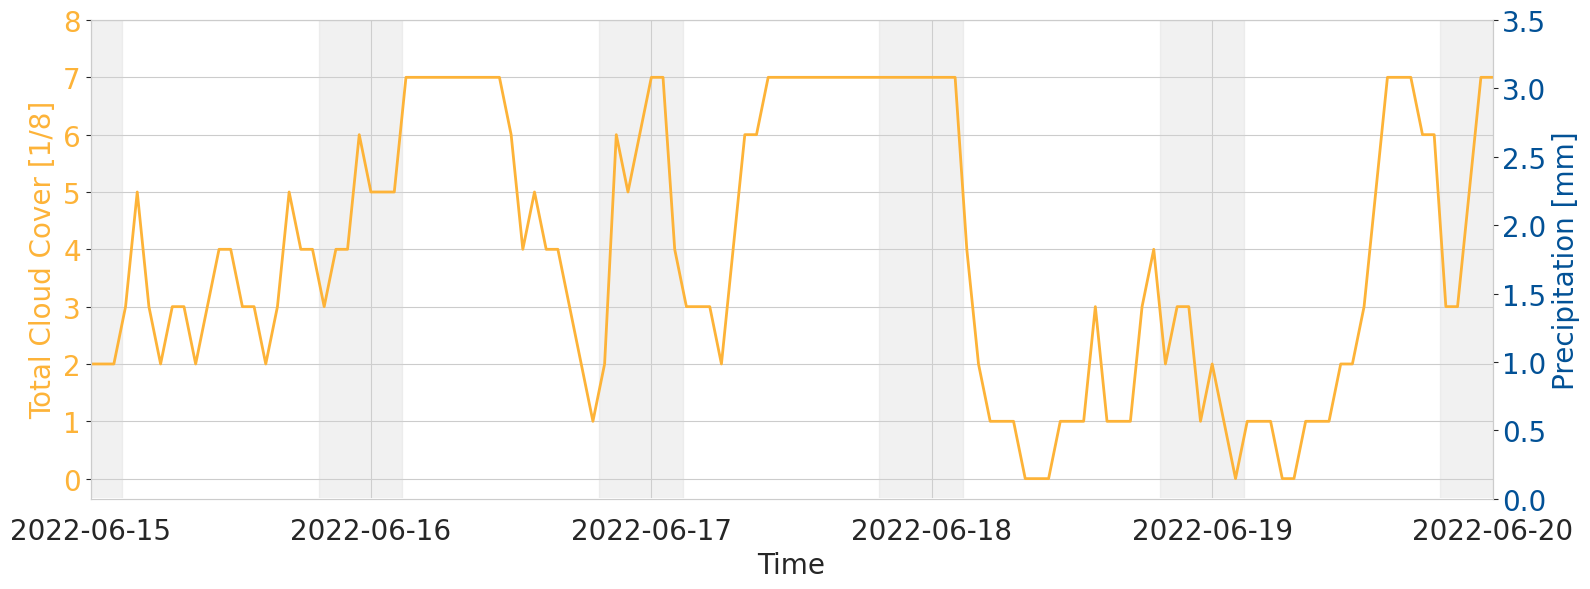

In [266]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(params)

fig, ax1 = plt.subplots(figsize=(16, 6))

# Define night start and end times
a, b = 19, 31
c, d = 2, 42

night_start = [pd.Timestamp(2022, 6, 14, a, b), pd.Timestamp(2022, 6, 15, a, b), pd.Timestamp(2022, 6, 16, a, b),
               pd.Timestamp(2022, 6, 17 , a, b), pd.Timestamp(2022, 6, 18, a, b),
               pd.Timestamp(2022, 6, 19, a, b)]

night_end = [ pd.Timestamp(2022, 6, 15, c, d), pd.Timestamp(2022, 6, 16, c, d), pd.Timestamp(2022, 6, 17, c, d),
               pd.Timestamp(2022, 6, 18 , c, d), pd.Timestamp(2022, 6, 19, c, d),
               pd.Timestamp(2022, 6, 20, c, d)]


for start, end in zip(night_start, night_end):
    ax1.axvspan(start, end, color='lightgrey', alpha=0.3)

ax1.plot(ber_obs_22_clouds.MESS_DATUM, ber_obs_22_clouds.V_N, color='#FDB338', lw=2, label='Cloud Cover')
ax1.set_ylabel('Total Cloud Cover [1/8]', size=20, color='#FDB338')
ax1.tick_params(axis='y', labelcolor='#FDB338')

y_values = np.arange(0, 9, 1)
ax1.set_yticks(y_values)
ax1.tick_params(axis='y', labelsize=20)

ax1.set_xlim(pd.Timestamp(2022, 6, 15, 00), pd.Timestamp(2022, 6, 20, 00))
ax1.set_xticks(pd.date_range(start='2022-06-15', end='2022-06-20', freq='D'))
ax1.set_xlabel('Time', size=20)
ax1.tick_params(axis='x', pad=10)

ax2 = ax1.twinx()

ax1.grid(True)
ax2.grid(False)

ax2.bar(ber_obs_22_rain.MESS_DATUM, ber_obs_22_rain.R1, color='#025196', lw=2, label='Cloud Cover', width=0.05)
ax2.set_ylim(0,3.5)
ax2.set_ylabel('Precipitation [mm]', size=20, color='#025196')
ax2.tick_params(axis='y', labelcolor='#025196')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


plt.tight_layout()

plt.savefig('./plots_2024/observations_Berlin_Dahlem_precip_cc_2022.jpeg')

plt.show()
